In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

#from rope.base.oi.soa import analyze_module
from scipy.stats import linregress
import libraries as lib

In [5]:
directory = "../../../../OneDrive - HvA/Logfiles/SOLAR/2023/20230615_testvaart_Amstel/0014 - 20230615T131248 3h14m8s 22.186km Duivendrecht"
file_accu = "8_ACCU.csv"
file_master = "1_MASTER.csv"

In [30]:
data_file_accu = lib.DataInladen(f'{directory}/{file_accu}',debug=False)
data_file_master = lib.DataInladen(f'{directory}/{file_master}',debug=False)

In [31]:
# Update the function to use the correct time columns based on the observed data
def resample_and_merge(df1, df2, time_column_df1, time_column_df2, freq='1S'):
    # Convert the time columns (which are in seconds) to a numeric format, forcing errors to NaN
    df1[time_column_df1] = pd.to_numeric(df1[time_column_df1], errors='coerce')
    df2[time_column_df2] = pd.to_numeric(df2[time_column_df2], errors='coerce')
    
    # Drop rows with NaN values in the time column
    df1.dropna(subset=[time_column_df1], inplace=True)
    df2.dropna(subset=[time_column_df2], inplace=True)
    
    # Convert the time columns (which are now numeric) to a timedelta format
    df1[time_column_df1] = pd.to_timedelta(df1[time_column_df1], unit='s')
    df2[time_column_df2] = pd.to_timedelta(df2[time_column_df2], unit='s')
    
    # Round the time columns to the nearest second (or desired frequency)
    df1[time_column_df1] = df1[time_column_df1].dt.round(freq)
    df2[time_column_df2] = df2[time_column_df2].dt.round(freq)
    
    # Set the time columns as the index
    df1.set_index(time_column_df1, inplace=True)
    df2.set_index(time_column_df2, inplace=True)

    
    # Resample both dataframes to the desired frequency (1 second by default)
    df1_resampled = df1.resample(freq).mean()
    df2_resampled = df2.resample(freq).mean()
    
    # Merge the two dataframes based on the time index
    merged_df = pd.merge(df1_resampled, df2_resampled, left_index=True, right_index=True, how='outer')
    
    return merged_df

# Apply the function using the correct time columns
merged_df = resample_and_merge(data_file_master, data_file_accu, time_column_df1='Dataloggertijd, in s', time_column_df2='Dataloggertijd, in s')

merged_df

,Datalogger port_x,Tijd,Latitude,Longitude,Snelheid over de grond in km/h,Richting van de snelheid,Datum_x,Magnetische variatie,Magnetische directie,Data in balancers,...,Charge 3 spanning,Charge 3 stroom,Charge 4 spanning,Charge 4 stroom,Charge 5 spanning,Charge 5 stroom,Discharge 0 spanning,Discharge 0 stroom,Discharge 1 spanning,"I’m, welke accu ben ik"
"Dataloggertijd, in s",,,,,,,,,,,,,,,,,,,,,
0 days 00:05:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.072000,0.4,0.016000,0.4,0.013000,58.9,0.096000,30.5,0.202000,NaN
0 days 00:05:33,1.0,111249.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.072000,0.4,0.016000,0.4,0.013000,58.9,0.096000,30.5,0.202000,NaN
0 days 00:05:34,1.0,111250.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.071000,0.4,0.015000,0.4,0.012000,58.9,0.099000,30.5,0.200000,NaN
0 days 00:05:35,1.0,111251.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.071000,0.4,0.015000,0.4,0.012000,58.9,0.099000,30.5,0.200000,NaN
0 days 00:05:36,1.0,111252.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.073000,0.4,0.016000,0.4,0.013000,58.9,0.098000,30.5,0.205000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 03:19:36,1.0,142652.0,5219.9052,453.9402,0.0,1.9,150623.0,NaN,NaN,111001011.0,...,0.017875,0.4,0.016125,0.4,0.010000,58.4,0.111625,30.2,-0.001500,NaN
0 days 03:19:37,1.0,142653.0,5219.9052,453.9402,0.0,1.9,150623.0,NaN,NaN,111001011.0,...,0.018000,0.4,0.016000,0.4,0.010000,58.4,0.114000,30.2,-0.001000,NaN
0 days 03:19:38,1.0,142654.0,5219.9052,453.9402,0.0,1.9,150623.0,NaN,NaN,111001011.0,...,0.019750,0.4,0.015125,0.4,0.011750,58.4,0.119250,30.2,-0.003625,NaN


In [37]:
xas = 'Snelheid over de grond in km/h'
yas = 'Totale accu stroom'
zas = 'Huidige percentage van accu'
# Filtering the data so it's only the laps we want to analyze
# First filter so that the data without GPS data is removed
data_file_filtered = merged_df[merged_df[xas] != 0]
data_file_filtered = merged_df[merged_df[yas] != 0]

# Now filter out the beginning and end of the data, by removing the first and last 10% of the data
from math import ceil
#data_file
#data_file = data_file.iloc[ceil(len(data_file)*0.215):ceil(len(data_file)*0.267)]

# Display the filtered data
data_file_filtered

,Datalogger port_x,Tijd,Latitude,Longitude,Snelheid over de grond in km/h,Richting van de snelheid,Datum_x,Magnetische variatie,Magnetische directie,Data in balancers,...,Charge 3 spanning,Charge 3 stroom,Charge 4 spanning,Charge 4 stroom,Charge 5 spanning,Charge 5 stroom,Discharge 0 spanning,Discharge 0 stroom,Discharge 1 spanning,"I’m, welke accu ben ik"
"Dataloggertijd, in s",,,,,,,,,,,,,,,,,,,,,
0 days 00:05:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.072000,0.4,0.016000,0.4,0.013000,58.9,0.096000,30.5,0.202000,NaN
0 days 00:05:33,1.0,111249.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.072000,0.4,0.016000,0.4,0.013000,58.9,0.096000,30.5,0.202000,NaN
0 days 00:05:34,1.0,111250.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.071000,0.4,0.015000,0.4,0.012000,58.9,0.099000,30.5,0.200000,NaN
0 days 00:05:35,1.0,111251.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.071000,0.4,0.015000,0.4,0.012000,58.9,0.099000,30.5,0.200000,NaN
0 days 00:05:36,1.0,111252.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.073000,0.4,0.016000,0.4,0.013000,58.9,0.098000,30.5,0.205000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 03:19:36,1.0,142652.0,5219.9052,453.9402,0.0,1.9,150623.0,NaN,NaN,111001011.0,...,0.017875,0.4,0.016125,0.4,0.010000,58.4,0.111625,30.2,-0.001500,NaN
0 days 03:19:37,1.0,142653.0,5219.9052,453.9402,0.0,1.9,150623.0,NaN,NaN,111001011.0,...,0.018000,0.4,0.016000,0.4,0.010000,58.4,0.114000,30.2,-0.001000,NaN
0 days 03:19:38,1.0,142654.0,5219.9052,453.9402,0.0,1.9,150623.0,NaN,NaN,111001011.0,...,0.019750,0.4,0.015125,0.4,0.011750,58.4,0.119250,30.2,-0.003625,NaN


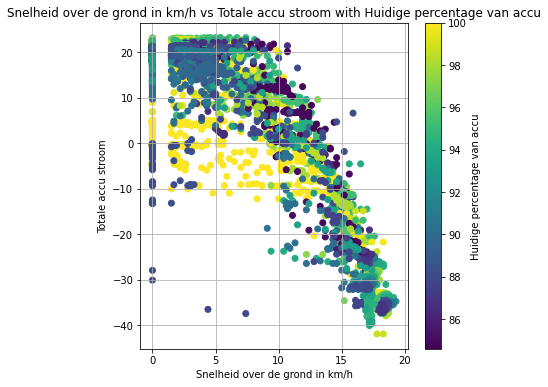

In [38]:
#%matplotlib qt
'Plotting the race'
plt.figure(figsize=(6,6))
plt.scatter(merged_df[xas], merged_df[yas], c=merged_df[zas], cmap='viridis')
plt.title(xas + ' vs ' + yas + ' with ' + zas)
plt.xlabel(xas)
plt.ylabel(yas)

# Adding a colorbar with a label for the speed in km/h
cbar = plt.colorbar()
cbar.set_label(zas)
plt.grid()
plt.show()


In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract data for plotting
latitudes = data_file['Latitude'].values
longitudes = data_file['Longitude'].values
speeds = data_file['Snelheid over de grond in km/h'].values

# Plotting the race with a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with height representing speed
scatter = ax.scatter(latitudes, longitudes, speeds, c=speeds, cmap='viridis', s=10)

# Adding labels and title
ax.set_title('GPS data vs speed')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Speed (km/h)')

# Adding a colorbar with a label for the speed in km/h
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Speed (km/h)')

plt.show()

In [10]:
def plotten(xas,yas, zas = None):
    return
